In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import geopandas as gpd
import glob
from tqdm import tqdm

%matplotlib inline
import statsmodels as sm
from statsmodels.imputation import mice

In [3]:
ref = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\tblRockGeoData.csv', index_col = [0])
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\ngdbrock-fUS56\\ngdbrock-fUS56\\'
allFiles=glob.glob(path+"*.csv")
analysis = pd.DataFrame
moving = []
for file in allFiles:
    types = pd.read_csv(file)
    moving.append(types)
analysis = pd.concat(moving, sort=False)
    
    
merged = ref.merge(analysis, on='lab_id')
merged.drop(columns=['br_ppm', 'ir_ppm','rn_ppm', 'i_ppm', 'ir_ppb', 'au_ppb'], inplace=True)
merged['tracking'] = np.arange(0,len(merged))

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,14,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
merged.iloc[:,-70:-3]

al_pct  ca_pct  fe_pct  k_pct  mg_pct  na_pct  p_ppm  ti_ppm  ag_ppm  \
0         NaN   10.00    0.70    NaN    0.30     NaN    0.0  1500.0     1.0   
1         NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
2         NaN    0.70    1.00    NaN    0.70     NaN    0.0  2000.0     1.0   
3         NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
4         NaN    3.00    0.70    NaN    0.50     NaN    0.0  1000.0     1.0   
5         NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
6         NaN    5.00    0.70    NaN    0.30     NaN    0.0  1000.0     1.0   
7         NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
8         NaN    0.30    0.20    NaN    0.15     NaN    0.0   700.0     1.0   
9         NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
10        NaN    0.50    0.70    NaN    0.20     NaN    0.0  1000.0     1.0   
11        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
12        NaN    0.50    0.70    NaN    0.50     NaN    0.0  1500.0     1.0   
13        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
14        NaN   10.00    0.70    NaN    0.30     NaN    0.0   700.0     1.0   
15        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
16        NaN   10.00    0.70    NaN    0.30     NaN    0.0  1000.0     1.0   
17        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
18        NaN   10.00    1.50    NaN    0.50     NaN    0.0  1500.0     1.0   
19        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
20        NaN    0.20    1.50    NaN    0.70     NaN    0.0  1500.0     1.0   
21        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
22        NaN   10.00    0.70    NaN    0.20     NaN    0.0   300.0     1.0   
23        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
24        NaN   10.00    1.50    NaN    0.70     NaN    0.0  1500.0     1.0   
25        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
26        NaN    0.30    1.50    NaN    0.50     NaN    0.0  1500.0     1.0   
27        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
28        NaN    7.00    1.50    NaN    0.70     NaN    0.0  2000.0     1.0   
29        NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
...       ...     ...     ...    ...     ...     ...    ...     ...     ...   
29584    7.55    7.09    9.34    0.2    4.49     NaN  300.0  5900.0     8.0   
29585     NaN    7.20    9.31    1.3     NaN   2.050    NaN     NaN     NaN   
29586    7.93    8.21    7.78    0.2    5.10     NaN  200.0  3700.0     8.0   
29587     NaN    7.80    7.96    1.1     NaN   1.660    NaN     NaN     NaN   
29588     NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
29589    5.93    7.12    5.74    0.6    3.22     NaN  300.0  3600.0     8.0   
29590     NaN    7.70    5.92    0.9     NaN   0.812    NaN     NaN     NaN   
29591    8.18    4.54    1.18    1.2    0.30     NaN  600.0  3500.0     8.0   
29592     NaN    4.70    1.17    1.3     NaN   0.759    NaN     NaN     NaN   
29593    1.97    1.11    7.88    0.2   18.60     NaN  200.0  1000.0     8.0   
29594     NaN    0.70    3.70    2.7     NaN   1.040    NaN     NaN     NaN   
29595     NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
29596    2.58    2.23    7.20    0.2   17.20     NaN  200.0  1500.0     8.0   
29597     NaN    2.20    7.45    0.7     NaN   0.010    NaN     NaN     NaN   
29598     NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
29599    2.16    0.90    7.67    0.2   18.20     NaN  200.0  1000.0     8.0   
29600     NaN    0.82    7.57    0.7     NaN   0.010    NaN     NaN     NaN   
29601     NaN     NaN     NaN    NaN     NaN     NaN    NaN     NaN     NaN   
29602    2.25    8.39    7.94    0.2   10.30     NaN  200

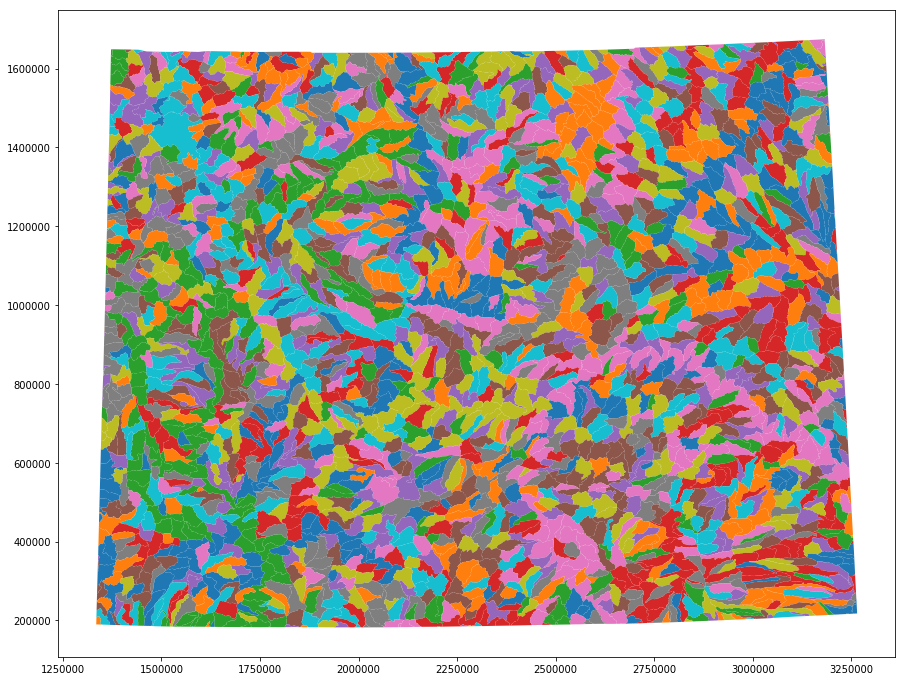

In [26]:
huc12=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12= huc12.to_crs({'init': 'epsg:3732'})
huc12.plot(column='HU_12_NAME',figsize=(15, 15))

In [20]:
huc12.head()

AREA  PERIMETER  WY_HU12_  WY_HU12_ID     HUC_8      HUC_10  \
0  0.017128   1.193807       142          52  10070006  1007000606   
1  0.018025   0.729417       154          25  10070001  1007000107   
2  0.009996   0.641990       156          63  10080010  1008001005   
3  0.017971   0.812602       157          62  10080014  1008001404   
4  0.018981   0.928344       161          92  10110201  1011020103   

         HUC_12         ACRES STATES  NCONTRB_A  \
0  100700060606  37018.484803     MT        0.0   
1  100700010708  38981.817764  MT,WY        0.0   
2  100800100502  21617.842823  MT,WY        0.0   
3  100800140404  38861.584596  MT,WY        0.0   
4  101102010303  41043.604159  MT,WY        0.0   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                 HU_12_NAME HU_12_MOD HU_12_TYPE HU_2_NAME  \
0  Clarks Fork Yellowstone River-Wolf Creek        IT          S  Missouri   
1                 Buffalo Creek-Lamar River        NM          S  Missouri   
2            Crooked Creek-Lost Water Creek        NM          S  Missouri   
3                    Sage Creek-Piney Creek        NM          S  Missouri   
4     Little Missouri River-Sevenmile Creek        NM          S  Missouri   

                  HU_4_NAME          HU_6_NAME                HU_8_NAME  \
0         Upper Yellowstone  Upper Yellowstone  Clarks Fork Yellowstone   
1         Upper Yellowstone  Upper Yellowstone   Yellowstone Headwaters   
2                  Big Horn           Big Horn            Big Horn Lake   
3                  Big Horn           Big Horn                 Shoshone   
4  Missouri-Little Missouri    Little Missouri    Upper Little Missouri   

  Shape_Leng Shape_Area                                           geometry  
0   0.015184   0.000005  POLYGON ((1903763.629862747 1640027.750380358,...  
1   0.229015   0.002262  POLYGON ((1574296.329015927 1642698.828491207,...  
2   0.139903   0.000775  POLYGON ((2072691.223032293 1640198.139759993,...  
3   0.098768   0.000323  POLYGON ((1989401.907262035 1639974.958820101,...  
4   0.157299   0.000806  POLYGON ((3129176.7486415 1671534.507742006, 3...  

[5 rows x 25 columns]

In [16]:
imp=sm.imputation.mice.MICEData(merged.iloc[:,32:],perturbation_method='gaussian', k_pmm=2)
for j in tqdm(range(200)):
    imp.update_all()
    if j%10 ==0:
        print(j)
        #imp.data.to_csv('D:\yep'+str(j)+'.csv')
    else:
        pass

TypeError: Could not convert Emission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherX-Ray flourescense spectrometryOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherOtherOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisOtherUnknownNeutron activation analysisOtherUnknownNeutron activation analysisOtherUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisOtherUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisOtherUnknownNeutron activation analysisOtherUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisOtherUnknownNeutron activation analysisOtherUnknownNeutron activation analysisOtherUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisOtherUnknownNeutron activation analysisOtherUnknownNeutron activation analysisOtherUnknownNeutron activation analysisOtherUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownOtherUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownOtherUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownOtherUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownEmission spectroscoppyNeutron activation analysisUnknownEmission spectroscoppyNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisOtherUnknownX-Ray flourescense spectrometryEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisUnknownInductively coupled plasma-atomic emission spectrometryNeutron activation analysisUnknownNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisUnknownInductively coupled plasma-atomic emission spectrometryNeutron activation analysisUnknownInductively coupled plasma-atomic emission spectrometryNeutron activation analysisUnknownEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryEmission spectroscoppyUnknownEmission spectroscoppyUnknownEmission spectroscoppyUnknownEmission spectroscoppyEmission spectroscoppyUnknownEmission spectroscoppyEmission spectroscoppyUnknownEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyNeutron activation analysisOtherUnknownEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownX-Ray flourescense spectrometryX-Ray flourescense spectrometryEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryEmission spectroscoppyEmission spectroscoppyUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisNeutron activation analysisUnknownX-Ray flourescense spectrometryUnknownX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryUnknownInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyOtherUnknownEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisX-Ray flourescense spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled plasma-atomic emission spectrometryNeutron activation analysisX-Ray flourescense spectrometryInductively coupled-mass spectrometryNeutron activation analysisInductively coupled-mass spectrometryNeutron activation analysisInductively coupled-mass spectrometryNeutron activation analysisInductively coupled-mass spectrometryNeutron activation analysisInductively coupled-mass spectrometryNeutron activation analysisEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherNeutron activation analysisEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyNeutron activation analysisOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyOtherUnknownEmission spectroscoppyUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherEmission spectroscoppyOtherInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled-mass spectrometryInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyNeutron activation analysisEmission spectroscoppyNeutron activation analysisNeutron activation analysisX-Ray flourescense spectrometryEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyEmission spectroscoppyInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryInductively coupled plasma-atomic emission spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownNeutron activation analysisUnknownX-Ray flourescense spectrometryNeutron activation analysisUnknownX-Ray flourescense spectrometryNeutron activation analysisUnknownX-Ray flourescense spectrometryNeutron activation analysisUnknownX-Ray flourescense spectrometryNeutron activation analysisUnknownX-Ray flourescense spectrometryNeutron activation analysisUnknownX-Ray flourescense spectrometryNeutron activation analysisUnknownX-Ray flourescense spectrometryNeutron activation analysisUnknownX-Ray flourescense spectrometryNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyNeutron activation analysisUnknownEmission spectroscoppyNeutron activation analysisUnknownNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisEmission spectroscoppyNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisNeutron activation analysisUnknownUnknownUnknownUnknownUnknownUnknownInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherNeutron activation analysisNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryNeutron activation analysisOtherInductively coupled plasma-atomic emission spectrometryOtherOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherInductively coupled plasma-atomic emission spectrometryOtherNeutron activation analysisInductively coupled plasma-atomic emission spectrometryNeutron activation analysis to numeric

In [14]:
imputed_merged = merged[['lab_id', 'job_id', 'submitter', 'date_sub', 'date_sub2', 'field_id',
       'state', 'country', 'datum', 'spheroid', 'latitude', 'longitude',
       'depth', 'locat_desc', 'datecollct', 'sample_src', 'methcollct',
       'primeclass', 'xndryclass', 'spec_name', 'addl_attr', 'geol_age',
       'stratgrphy', 'mineralztn', 'alteration', 'struct_src', 'dep_envirn',
       'source_rk', 'metamrphsm', 'facies_grd', 'prep', 'mesh_size', 'tracking']].merge(imp.data, on='tracking')
imputed_merged.to_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\imputed_rock_values.csv')

NameError: name 'imp' is not defined

In [17]:
imputed_merged = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\imputed_rock_values.csv')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,9,10,13,14,15,21,27,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


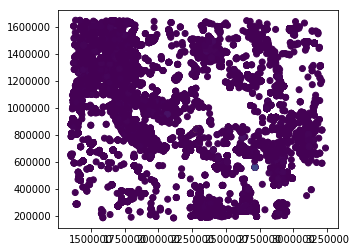

In [18]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(imputed_merged.longitude, imputed_merged.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(imputed_merged, crs={'init': 'epsg:4326'}, geometry=geometry)
projGeoDF=geo_df.to_crs(crs)
projGeoDF.plot(column='co_ppm')

In [19]:
points_with_basin=gpd.sjoin(huc12, projGeoDF, how='inner', op='intersects')

In [20]:
maximal = points_with_basin.dissolve(by='HUC_12', aggfunc='max')

In [21]:
maximal = maximal.drop(columns=['AREA', 'PERIMETER', 'WY_HU12_', 'WY_HU12_ID', 'HUC_8',
       'HUC_10', 'ACRES', 'STATES', 'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME',
       'HU_10_MOD', 'HU_10_TYPE', 'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD',
       'HU_12_TYPE', 'HU_2_NAME', 'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME',
       'Shape_Leng', 'Shape_Area', 'index_right'])
maximal.to_file(driver='ESRI Shapefile', filename='max_rock_values.shp')

# Read in the hotspot data

<Figure size 1296x864 with 0 Axes>

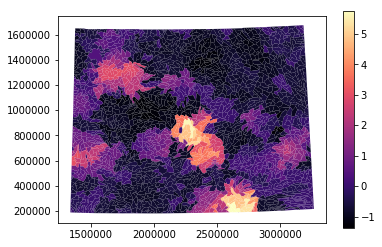

In [3]:
huc12 = gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12 = huc12.to_crs({'init': 'epsg:3732'})

path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\hotspot analysis\\rock hotspot joined with hucs\\Cu\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed, sort=False)
frame = frame.drop(columns=['Join_Count', 'TARGET_FID', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'SOURCE_ID',
       'GiPValue', 'NNeighbors', 'Gi_Bin',
       'Shape_Length', 'Shape_Area'])
summary = frame.groupby('HUC_12', as_index=False).sum()
middle=huc12.merge(summary.astype(object), on='HUC_12', how='right')
combined = huc12.merge(middle[['HUC_12', 'GiZScore']].astype(str), on='HUC_12', how='left')
plt.figure(figsize=(18,12)) 
combined.plot(column=pd.to_numeric(combined['GiZScore']), cmap='magma', legend=True)


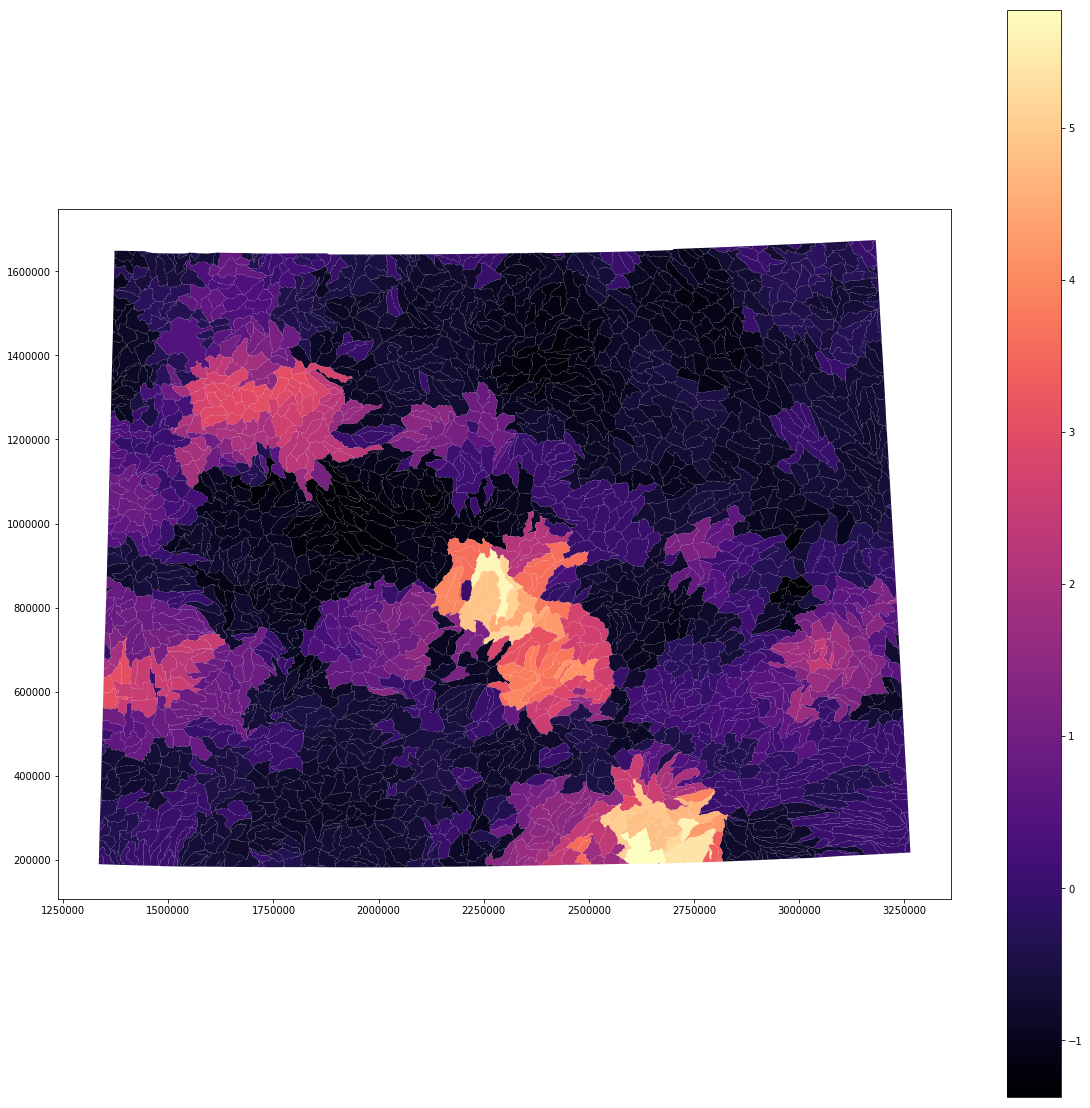

In [4]:
combined.plot(column=pd.to_numeric(combined['GiZScore']), cmap='magma', legend=True, figsize=(20, 20))

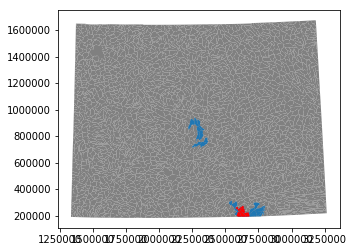

In [5]:
fig, ax = plt.subplots()
combined.plot( color='gray', ax=ax)
combined[pd.to_numeric(combined['GiZScore'])>=np.percentile(pd.to_numeric(combined['GiZScore']), 99)].plot(ax=ax)
combined[pd.to_numeric(combined['GiZScore'])==pd.to_numeric(combined['GiZScore']).max()].plot(ax=ax, color='r')

In [20]:
combined[pd.to_numeric(combined['GiZScore'])>=np.percentile(pd.to_numeric(combined['GiZScore']), 95)].to_file(driver='ESRI Shapefile', filename='PbCuZn_rock.shp')

In [177]:
combined[pd.to_numeric(combined['GiZScore'])>=np.percentile(pd.to_numeric(combined['GiZScore']), 99.9)]

AREA  PERIMETER  WY_HU12_  WY_HU12_ID     HUC_8      HUC_10  \
537  0.010888   0.644575       741         136  10070001  1007000101   
539  0.010444   0.725447       743         137  10070001  1007000102   
564  0.005835   0.342816       768         142  10070001  1007000102   
567  0.012827   0.595069       771         143  10070001  1007000102   
576  0.008160   0.438513       780         145  10070001  1007000101   
593  0.017619   0.701528       798         149  10070001  1007000101   
619  0.015751   0.855359       825         157  17040101  1704010106   
627  0.010846   0.576109       833         303  10080013  1008001301   
652  0.007650   0.439000       858         165  17040101  1704010106   
661  0.009295   0.533345       867         166  17040101  1704010106   

           HUC_12         ACRES STATES  NCONTRB_A         ...          \
537  100700010102  23939.540835     WY        0.0         ...           
539  100700010203  22953.389405     WY        0.0         ...           
564  100700010205  12836.175692     WY        0.0         ...           
567  100700010201  28218.875044     WY        0.0         ...           
576  100700010103  17957.152973     WY        0.0         ...           
593  100700010101  38797.287097     WY        0.0         ...           
619  170401010606  34715.566718     WY        0.0         ...           
627  100800130102  23906.751846     WY        0.0         ...           
652  170401010602  16868.777763     WY        0.0         ...           
661  170401010605  20497.934012     WY        0.0         ...           

    HU_12_MOD HU_12_TYPE          HU_2_NAME          HU_4_NAME  \
537        NM          S           Missouri  Upper Yellowstone   
539        NM          S           Missouri  Upper Yellowstone   
564        NM          S           Missouri  Upper Yellowstone   
567        NM          S           Missouri  Upper Yellowstone   
576        NM          S           Missouri  Upper Yellowstone   
593        NM          S           Missouri  Upper Yellowstone   
619        NM          S  Pacific Northwest        Upper Snake   
627        NM          S           Missouri           Big Horn   
652        NM          S  Pacific Northwest        Upper Snake   
661        NM          S  Pacific Northwest        Upper Snake   

             HU_6_NAME               HU_8_NAME Shape_Leng Shape_Area  \
537  Upper Yellowstone  Yellowstone Headwaters   0.644575   0.010888   
539  Upper Yellowstone  Yellowstone Headwaters   0.725447   0.010444   
564  Upper Yellowstone  Yellowstone Headwaters   0.342816   0.005835   
567  Upper Yellowstone  Yellowstone Headwaters   0.595069   0.012827   
576  Upper Yellowstone  Yellowstone Headwaters   0.438513   0.008160   
593  Upper Yellowstone  Yellowstone Headwaters   0.701528   0.017619   
619   Snake Headwaters        Snake Headwaters   0.855359   0.015751   
627           Big Horn     South Fork Shoshone   0.576109   0.010846   
652   Snake Headwaters        Snake Headwaters   0.439000   0.007650   
661   Snake Headwaters        Snake Headwaters   0.533345   0.009295   

                                              geometry            GiZScore  
537  POLYGON ((1608299.576571877 1337004.920142819,...  192.45712122400008  
539  POLYGON ((1627971.15736426 1333672.009896841, ...  192.45712122400008  
564  POLYGON ((1668031.666070117 1315111.707562657,...  192.45712122400008  
567  POLYGON ((1701375.116237481 1314059.67307658, ...  192.45712122400008  
576  POLYGON ((1625573.662783505 1292264.151836674,...  192.45712122400008  
593  POLYGON ((1653874.687240637 1301451.187082283,...  192.45712122400008  
619  POLYGON ((1640528.419578866 1259625.176101413,...  192.45712122400008  
627  POLYGON ((1717309.503436315 1267396.132879012,...  192.45712122400008  
652  POLYGON ((1676548.032863513 1262054.731417016,...  192.45712122400008  
661  POLYGON ((1642095.878057994 1259388.184016562,...  192.45712122400008  

[10 rows x 26 columns]

In [179]:
pd.to_numeric(combined['GiZScore']).max()

192.4571212240001

In [14]:
import time

In [ ]:
lengths=[]
for i in range(32,66):
    start = time.time()
    imp=sm.imputation.mice.MICEData(merged.iloc[:,i:-3],perturbation_method='gaussian', k_pmm=2)
    for j in tqdm(range(10)):
        imp.update_all()
        if j%10 ==0:
            print(j)
            #imp.data.to_csv('D:\yep'+str(j)+'.csv')
        else:
            pass
    end = time.time()
    lengths.append(end-start)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

0


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

0


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

0


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

0


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

0


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [02:35<00:17, 17.25s/it]

# Compare sediment and rock hotspots

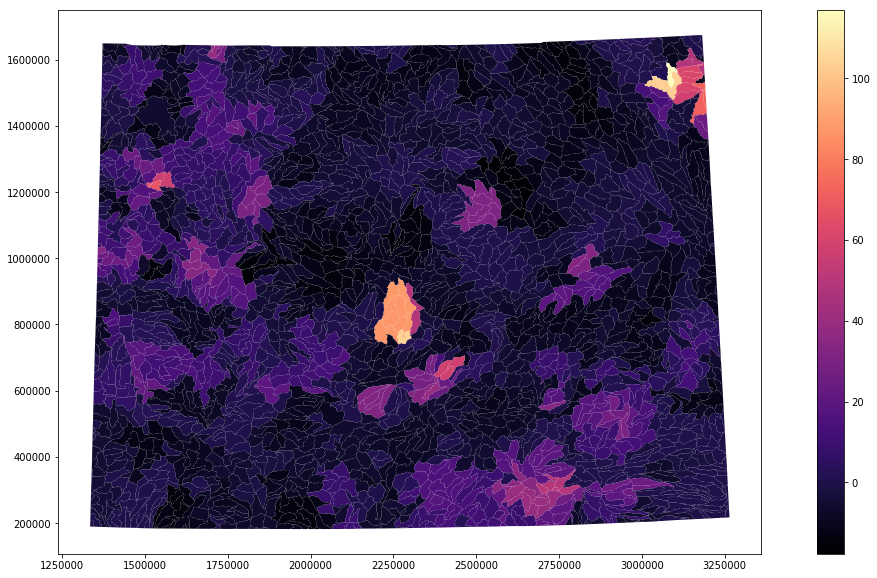

In [27]:
huc12 = gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12 = huc12.to_crs({'init': 'epsg:3732'})

path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\hotspot analysis\\rock hotspot joined with hucs\\REE\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed, sort=False)
frame = frame.drop(columns=['Join_Count', 'TARGET_FID', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'SOURCE_ID',
       'GiPValue', 'NNeighbors', 'Gi_Bin',
       ])
summary = frame.groupby('HUC_12', as_index=False).sum()
middle=huc12.merge(summary.astype(object), on='HUC_12', how='right')
combined = huc12.merge(middle[['HUC_12', 'GiZScore']].astype(str), on='HUC_12', how='left')
crs={'init': 'epsg:3732'}
combined= combined.to_crs(crs)
combined.plot(column=pd.to_numeric(combined['GiZScore']), cmap='magma', legend=True, figsize=(20,10))
combined['zscore'] = combined.GiZScore.astype(float).values
#combined.to_file(driver='ESRI Shapefile', filename='ree_rock_heatmap.shp')

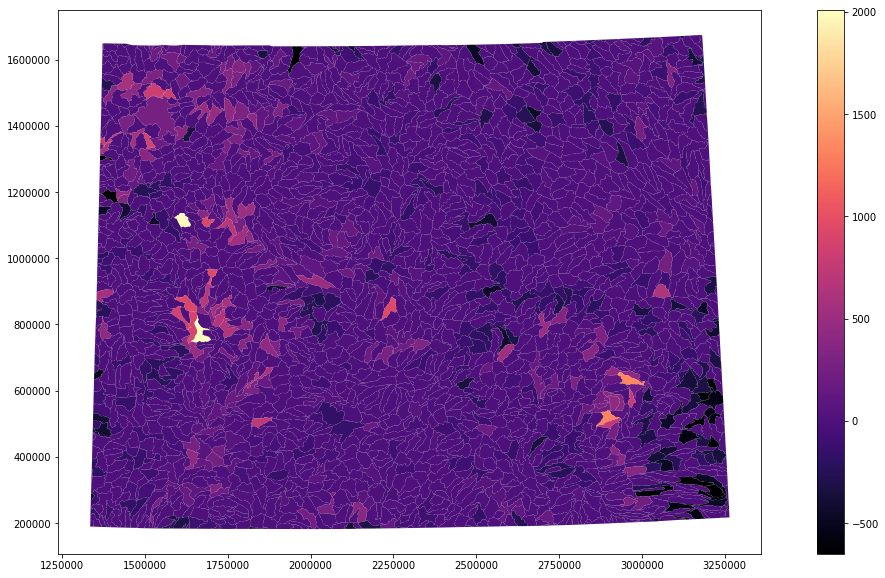

In [28]:
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\hotspot analysis\\sed hotspot joined with hucs\\REE\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed, sort=False)
'''
frame = frame.drop(columns=['Join_Count', 'TARGET_FID', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'SOURCE_ID',
       'GiPValue', 'NNeighbors', 'Gi_Bin',
       'Shape_Length', 'Shape_Area'])
'''
summary = frame.groupby('HUC_12', as_index=False).sum()
middle=huc12.merge(summary.astype(object), on='HUC_12', how='right')
sed_comb = huc12.merge(middle[['HUC_12', 'z_score']].astype(str), on='HUC_12', how='left')
crs={'init': 'epsg:3732'}
sed_comb= sed_comb.to_crs(crs)
sed_comb.plot(column=pd.to_numeric(sed_comb['z_score']), cmap='magma', legend=True, figsize=(20,10))
sed_comb['zscore'] = sed_comb.z_score.astype(float).values

#sed_comb.to_file(driver='ESRI Shapefile', filename='cu_sed_heatmap.shp')

In [29]:
imputed_merged = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\imputed_rock_values.csv')
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(imputed_merged.longitude, imputed_merged.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(imputed_merged, crs={'init': 'epsg:4326'}, geometry=geometry)
projGeoDF=geo_df.to_crs(crs)
points_with_basin=gpd.sjoin(huc12, projGeoDF, how='inner', op='intersects')
rock_basins = points_with_basin.HUC_12.unique()

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,9,10,13,14,15,21,27,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
matching = combined[combined['HUC_12'].isin(rock_basins)][['HUC_12','GiZScore']].merge(
    sed_comb[sed_comb['HUC_12'].isin(rock_basins)][['HUC_12','z_score']])

In [31]:
zone_one = matching[(matching['GiZScore']>='2') & (matching['z_score']<='-2')]
zone_two = matching[(matching['GiZScore']>='2')& (matching['z_score']>='-2') & (matching['z_score']<='2')]
zone_three = matching[(matching['GiZScore']>='2') & (matching['z_score']>='2')]
zone_four = matching[(matching['z_score']<='-2')& (matching['GiZScore']>='-2') & (matching['GiZScore']<='2')]
zone_five = matching[(matching['z_score']<='2')& (matching['z_score']>='-2') & (matching['GiZScore']>='-2') & (matching['GiZScore']<='2')]
zone_six = matching[(matching['z_score']>='2')& (matching['GiZScore']>='-2') & (matching['GiZScore']<='2')]
zone_seven = matching[(matching['z_score']<='-2')& (matching['GiZScore']<='-2')]
zone_eight = matching[(matching['GiZScore']<='-2')& (matching['z_score']>='-2') & (matching['z_score']<='2')]
zone_nine = matching[(matching['GiZScore']<='-2') & (matching['z_score']>='2')]

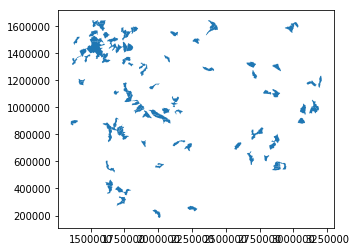

In [32]:
missed = huc12[(huc12['HUC_12'].isin(zone_six.HUC_12.values)) |(huc12['HUC_12'].isin(zone_nine.HUC_12.values))]
#missed opportunity map
missed.to_file(driver='ESRI Shapefile', filename='ree_missed_opportunity.shp')
missed.plot()

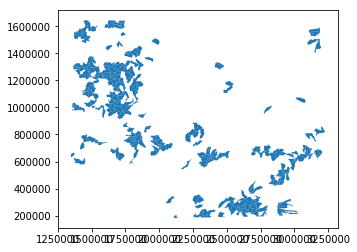

In [33]:
known = huc12[(huc12['HUC_12'].isin(zone_one.HUC_12.values)) |(huc12['HUC_12'].isin(zone_two.HUC_12.values))
     |(huc12['HUC_12'].isin(zone_three.HUC_12.values))]
#known alteration map
known.to_file(driver='ESRI Shapefile', filename='ree_known_areas.shp')
known.plot()

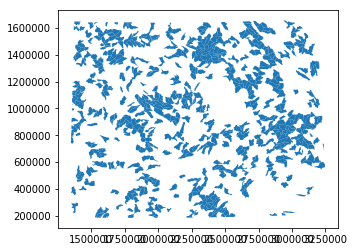

In [34]:
background = huc12[(huc12['HUC_12'].isin(zone_four.HUC_12.values)) |(huc12['HUC_12'].isin(zone_five.HUC_12.values))
     |(huc12['HUC_12'].isin(zone_eight.HUC_12.values))]
background.to_file(driver='ESRI Shapefile', filename='ree_background.shp')
background.plot()

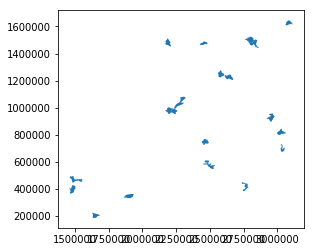

In [35]:
below = huc12[huc12['HUC_12'].isin(zone_seven.HUC_12.values)]
below.to_file(driver='ESRI Shapefile', filename='ree_below.shp')
below.plot()

In [22]:
z1 = (zone_one.shape[0]/matching.shape[0])*100 #cold sed, hot rock, known
z2 = (zone_two.shape[0]/matching.shape[0])*100 #neutral sed, hot rock, known
z3 = (zone_three.shape[0]/matching.shape[0])*100 #hot sed, hot rock, known 
z4 = (zone_four.shape[0]/matching.shape[0])*100 #neutral rock, cold sed, background
z5 = (zone_five.shape[0]/matching.shape[0])*100 #neutral sed, neutral rock, background
z6 = (zone_six.shape[0]/matching.shape[0])*100 #neutral rock, hot sed, missed
z7 = (zone_seven.shape[0]/matching.shape[0])*100 #cold sed, cold rock, below background
z8 = (zone_eight.shape[0]/matching.shape[0])*100 #cold rock, neutral sed, background
z9 = (zone_nine.shape[0]/matching.shape[0])*100 #hot sed, cold rock, missed

In [23]:
#missed opportunities
z6+z9

1.7374517374517375

In [24]:
#known deposits
z1+z2+z3

6.756756756756756

In [25]:
#background
z4+z5+z8

91.40926640926641

In [26]:
#below background
z7

0.09652509652509653

In [114]:
z1+z2+z3+z4+z5+z6+z7+z8+z9

100.0

# Areas where seds are hot and no rock samples

In [27]:
rock_free = sed_comb[sed_comb['HUC_12'].isin(rock_basins)==False]

In [28]:
(rock_free[rock_free['z_score']<='-2'].shape[0]/rock_free.shape[0])*100 #percent cold areas, so below background

0.07429420505200594

In [29]:
(rock_free[(rock_free['z_score']>='-2') &(rock_free['z_score']<='2')].shape[0]/rock_free.shape[0])*100 #percent neutral areas, background

98.06835066864784

In [30]:
(rock_free[rock_free['z_score']>='2'].shape[0]/rock_free.shape[0])*100 #percent hot areas, potential opportunities

1.8573551263001487

In [31]:
acres = rock_free[rock_free['z_score']>='2'].ACRES.sum()+huc12[huc12['HUC_12'].isin(zone_one.HUC_12)].ACRES.sum()+huc12[huc12['HUC_12'].isin(zone_two.HUC_12)].ACRES.sum()

In [32]:
rock_free[rock_free['z_score']>='2'].shape[0]+zone_six.shape[0]+zone_nine.shape[0]

43

In [296]:
acres/huc12.ACRES.sum()

0.08853167061560525

In [297]:
acres

5955240.6113759

In [300]:
huc12[huc12['HUC_12'].isin(zone_three.HUC_12)].shape[0]+huc12[huc12['HUC_12'].isin(zone_six.HUC_12)].shape[0]+huc12[huc12['HUC_12'].isin(zone_nine.HUC_12)].shape[0]

272

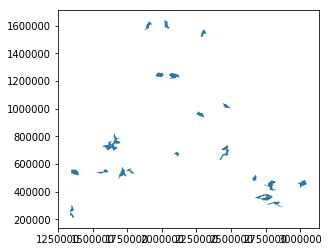

In [33]:
rock_free[rock_free['z_score']>='2'].plot()